In [1]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import turbine

nTurbine = 3 #Number of turbines in parallel

class Format:
    end = '\033[0m'
    underline = '\033[4m'

fluid   = "REFPROP::HYDROGEN"

T_in    = 73.9768166022620 #K
P_in    = 29.3800000000000 #bar
P_out   = 7.79500000000000 #bar

m       = 62118.3548409436/(3600*nTurbine) #kg/s

Turbine1 = turbine.Turbine(fluid, T_in, P_in, P_out, m)

In [2]:
Turbine1.initialSpec()

TURBO-EXPANDER INITIAL SPECIFICATION INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 5.7517

Inlet Condition
P [bar]     =  29.38
T [Kelvin]  =  73.98
H [kJ/kg]   =  947.871
S [kJ/kg.K] =  21.262


Isentropic Outlet Condition
P [bar]     =  7.795
T [Kelvin]  =  43.57
H [kJ/kg]   =  656.505
S [kJ/kg.K] =  21.262


Δh_is [kJ/kg]  =  291.366
Power_is [kW]  = 1675.85


In [3]:
#design constraint
u1_max  = 500 #m/s

Turbine1.noOfStages(u1_max)

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  255.102
Min. number of stage =  1
Max. number of stage =  3


In [4]:
Turbine1.rotationalSpeedRange()

Minimum & Maximum Rotational Speed
Min. RPM =  25214.197
Max. RPM =  87568.605


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-0.8


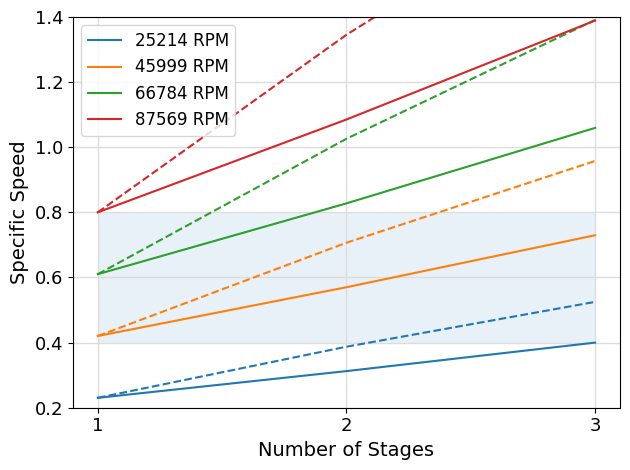

In [5]:
Turbine1.nzSelectionPlot()

In [6]:
Turbine1.stagesCalculation(52850, 1, True)

Stage 1
Delta enthalpy [kJ/kg]:261.33
Expansion ratio:3.77
Power [kW]:1503.11
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 2049.71,
 'Stator outlet pressure [bar]': 15.61,
 'Stator outlet temperature [℃]': -214.14,
 'Rotor outlet pressure [bar]': 7.8,
 'Rotor outlet temperature [℃]': -227.12,
 'Total-to-static efficiency [%]': 86.53,
 'Isentropic efficiency [%]': 89.7}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.631,
 'Rotor hub diameter ratio': 0.185,
 'Stator inlet diameter [cm]': 23.33,
 'Rotor inlet diameter [cm]': 17.58,
 'Rotor outlet diameter [cm]': 11.08,
 'Blade height at rotor inlet  [cm]': 1.12,
 'Blade height at rotor outlet  [cm]': 3.92}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 134.9,
                      'Absolute tangential rotor inlet': 536.8,
                      'Absolute rotor inlet': 553.5,
                      'Absolute tangential rotor outlet': 0.0,
                      'Absolute meridional rotor ou

In [7]:
Turbine1.turbDictionary()

RADIAL INFLOW TURBINE FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 5.751699522309592,
 'Turbine type': 'Radial inflow turbine',
 'Rotational speed [RPM]': 52850,
 'Number of stages': 1,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 29.38,
 'Inlet temperature [C]': -199.17,
 'Inlet volumetric [m3/h]': 2049.71,
 'Delta enthalpy [kJ/kg]': 261.33,
 'Expansion ratio': 0.27,
 'Turbine power [kW]': 1503.11,
 'Turb. Isentropic eff. [%]': 89.69,
 'Turb. Polytropic eff. [%]': 85.99}


In [8]:
StandardCond       = turbine.streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 273, 1.01325*1e5)
Volumetric_Nm3PerH = (Turbine1.massFlow/StandardCond.D)*3600

In [9]:
print(StandardCond.D)
print(Volumetric_Nm3PerH)

0.08993187859670276
230242.25228487217
